In [1]:
%load_ext autoreload
%autoreload 2

import ast
import os
import sys
import requests as req
import json
import multiprocessing as mp


from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

new_path = os.getcwd().replace('/notebooks', '')
print(f'Adding {new_path} to sys.path')

if new_path not in sys.path:
    sys.path.append(new_path)

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 10})

# Local imports
from curvemetrics.src.classes.datahandler import DataHandler
from curvemetrics.src.classes.datafetcher import DataFetcher
from curvemetrics.src.classes.metricsprocessor import MetricsProcessor
from curvemetrics.src.plotting.plot import bocd_plot_comp
from curvemetrics.src.classes.model import BOCD

Adding /root/curve-lp-metrics to sys.path


In [2]:
datahandler = DataHandler()

In [3]:
takers = datahandler.get_takers()
takers.head()

,amountBought,cumulativeMarkout,count,windowSize,amountSold,meanMarkout
buyer,,,,,,
0xdb886bf718fbf354eb4202b03ad13b1cafb01276,5.064775e+07,1.720375e+07,55.0,86400,5.045182e+07,312795.532169
0xeef86c2e49e11345f1a693675df9a38f7d880c8f,1.818329e+09,1.696571e+07,8160.0,86400,1.849629e+09,2079.130965
0xdef171fe48cf0115b1d80b88dc8eab59176fee57,5.737407e+08,1.093658e+07,4319.0,86400,5.774636e+08,2532.202508
0x1c073d5045b1abb6924d5f0f8b2f667b1653a4c3,5.758403e+08,8.825665e+06,1229.0,86400,5.840190e+08,7181.175800
0x81c46feca27b31f3adc2b91ee4be9717d1cd3dd7,5.208695e+08,8.451000e+06,5078.0,86400,5.169487e+08,1664.237827


In [6]:
sharks = datahandler.get_sharks(top=0.9)
print(f'There are {len(sharks)} sharks in the top 10% of takers.')
sharks[:5]

There are 1812 sharks in the top 10% of takers.


['0xdb886bf718fbf354eb4202b03ad13b1cafb01276',
 '0xeef86c2e49e11345f1a693675df9a38f7d880c8f',
 '0xdef171fe48cf0115b1d80b88dc8eab59176fee57',
 '0x1c073d5045b1abb6924d5f0f8b2f667b1653a4c3',
 '0x81c46feca27b31f3adc2b91ee4be9717d1cd3dd7']

In [12]:
pool = '0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7'
start = datetime.timestamp(datetime(2023, 3, 1))
end = datetime.timestamp(datetime(2023, 4, 1))

sharkflow = datahandler.get_pool_metric(pool, 'sharkflow', start, end)
sharkflow = sharkflow.resample('1H').sum()

swapflow = datahandler.get_pool_metric(pool, 'netSwapFlow', start, end)
swapflow = swapflow.resample('1H').sum()

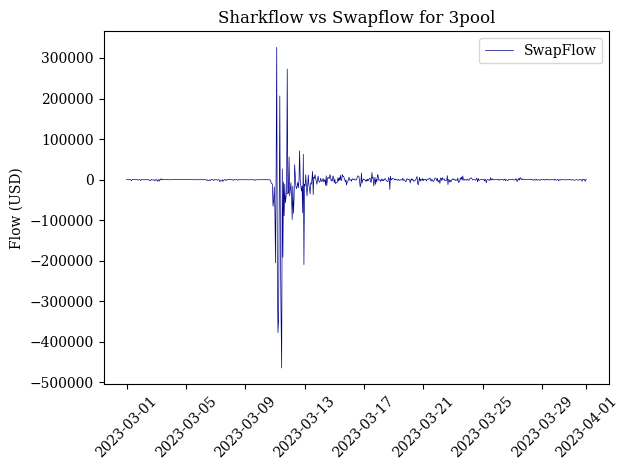

: 

In [13]:
f, ax = plt.subplots()

ax.plot(sharkflow.index, sharkflow, label='SharkFlow', color='darkred', linewidth=0.5)
ax.plot(swapflow.index, swapflow, label='SwapFlow', color='darkblue', linewidth=0.5)
ax.tick_params(axis='x', rotation=45)
ax.set_title("Sharkflow vs Swapflow for 3pool")
ax.set_ylabel("Flow (USD)")
ax.legend()
f.tight_layout()